# 十分钟上手 Pandas

`pandas` 是一个 `Python Data Analysis Library`。

安装请参考官网的教程，如果安装了 `Anaconda`，则不需要安装 `pandas` 库。

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 产生 Pandas 对象

`pandas` 中有三种基本结构：

- `Series`
    - 1D labeled homogeneously-typed array
- `DataFrame`
    - General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns
- `Panel`
    - General 3D labeled, also size-mutable array

### Series

一维 `Series` 可以用一维列表初始化：

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

print (s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


默认情况下，`Series` 的下标都是数字（可以使用额外参数指定），类型是统一的。

### DataFrame

`DataFrame` 则是个二维结构，这里首先构造一组时间序列，作为我们第一维的下标：

In [3]:
dates = pd.date_range('20130101', periods=6)  # 生成日期序列

print (dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


然后创建一个 `DataFrame` 结构：

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

df

,A,B,C,D
2013-01-01,0.905271,1.143303,0.582894,1.748231
2013-01-02,-0.743500,0.174990,-0.079147,-2.299302
2013-01-03,0.443517,-0.682285,0.210818,1.047328
2013-01-04,-1.120377,2.445881,2.591837,0.788021
2013-01-05,0.764369,1.603173,0.578856,-0.265932
2013-01-06,-0.061097,0.216218,0.890899,0.012585


默认情况下，如果不指定 `index` 参数和 `columns`，那么他们的值将用从 `0` 开始的数字替代。

除了向 `DataFrame` 中传入二维数组，我们也可以使用字典传入数据：

In [6]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


字典的每个 `key` 代表一列，其 `value` 可以是各种能够转化为 `Series` 的对象。

与 `Series` 要求所有的类型都一致不同，`DataFrame` 值要求每一列数据的格式相同：

In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 查看数据

### 头尾数据

`head` 和 `tail` 方法可以分别查看最前面几行和最后面几行的数据（默认为 5）：

In [8]:
df.head()

,A,B,C,D
2013-01-01,0.905271,1.143303,0.582894,1.748231
2013-01-02,-0.743500,0.174990,-0.079147,-2.299302
2013-01-03,0.443517,-0.682285,0.210818,1.047328
2013-01-04,-1.120377,2.445881,2.591837,0.788021
2013-01-05,0.764369,1.603173,0.578856,-0.265932


最后 3 行：

In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.120377,2.445881,2.591837,0.788021
2013-01-05,0.764369,1.603173,0.578856,-0.265932
2013-01-06,-0.061097,0.216218,0.890899,0.012585


### 下标，列标，数据

下标使用 `index` 属性查看：

In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

列标使用 `columns` 属性查看：

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

数据值使用 `values` 查看：

In [12]:
df.values

array([[ 0.90527144,  1.14330338,  0.58289396,  1.7482309 ],
       [-0.74350047,  0.17499013, -0.07914727, -2.29930176],
       [ 0.44351746, -0.68228488,  0.21081776,  1.0473279 ],
       [-1.12037707,  2.44588113,  2.59183695,  0.78802118],
       [ 0.76436905,  1.60317339,  0.57885643, -0.26593248],
       [-0.06109693,  0.2162177 ,  0.8908985 ,  0.01258481]])

### 统计数据

查看简单的统计数据：

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.031364,0.816880,0.796026,0.171822
std,0.825391,1.131262,0.941799,1.411008
min,-1.120377,-0.682285,-0.079147,-2.299302
25%,-0.572900,0.185297,0.302827,-0.196303
50%,0.191210,0.679761,0.580875,0.400303
75%,0.684156,1.488206,0.813897,0.982501
max,0.905271,2.445881,2.591837,1.748231


### 转置

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.905271,-0.743500,0.443517,-1.120377,0.764369,-0.061097
B,1.143303,0.174990,-0.682285,2.445881,1.603173,0.216218
C,0.582894,-0.079147,0.210818,2.591837,0.578856,0.890899
D,1.748231,-2.299302,1.047328,0.788021,-0.265932,0.012585


## 排序

`sort_index(axis=0, ascending=True)` 方法按照下标大小进行排序，`axis=0` 表示按第 0 维进行排序。

In [15]:
df.sort_index(ascending=False)

,A,B,C,D
2013-01-06,-0.061097,0.216218,0.890899,0.012585
2013-01-05,0.764369,1.603173,0.578856,-0.265932
2013-01-04,-1.120377,2.445881,2.591837,0.788021
2013-01-03,0.443517,-0.682285,0.210818,1.047328
2013-01-02,-0.743500,0.174990,-0.079147,-2.299302
2013-01-01,0.905271,1.143303,0.582894,1.748231


In [16]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.748231,0.582894,1.143303,0.905271
2013-01-02,-2.299302,-0.079147,0.174990,-0.743500
2013-01-03,1.047328,0.210818,-0.682285,0.443517
2013-01-04,0.788021,2.591837,2.445881,-1.120377
2013-01-05,-0.265932,0.578856,1.603173,0.764369
2013-01-06,0.012585,0.890899,0.216218,-0.061097


`sort_values(by, axis=0, ascending=True)` 方法按照 `by` 的值的大小进行排序，例如按照 `B` 列的大小：

In [17]:
df.sort_values(by="B")

,A,B,C,D
2013-01-03,0.443517,-0.682285,0.210818,1.047328
2013-01-02,-0.743500,0.174990,-0.079147,-2.299302
2013-01-06,-0.061097,0.216218,0.890899,0.012585
2013-01-01,0.905271,1.143303,0.582894,1.748231
2013-01-05,0.764369,1.603173,0.578856,-0.265932
2013-01-04,-1.120377,2.445881,2.591837,0.788021


## 索引

虽然 `DataFrame` 支持 `Python/Numpy` 的索引语法，但是推荐使用 `.at, .iat, .loc, .iloc 和 .ix` 方法进行索引。

### 读取数据

选择单列数据：

In [18]:
df["A"]

2013-01-01    0.905271
2013-01-02   -0.743500
2013-01-03    0.443517
2013-01-04   -1.120377
2013-01-05    0.764369
2013-01-06   -0.061097
Freq: D, Name: A, dtype: float64

也可以用 `df.A`：

In [19]:
df.A

2013-01-01    0.905271
2013-01-02   -0.743500
2013-01-03    0.443517
2013-01-04   -1.120377
2013-01-05    0.764369
2013-01-06   -0.061097
Freq: D, Name: A, dtype: float64

使用切片读取多行：

In [20]:
df[0:3]

,A,B,C,D
2013-01-01,0.905271,1.143303,0.582894,1.748231
2013-01-02,-0.743500,0.174990,-0.079147,-2.299302
2013-01-03,0.443517,-0.682285,0.210818,1.047328


`index` 名字也可以进行切片：

In [21]:
df["20130101":"20130103"]

,A,B,C,D
2013-01-01,0.905271,1.143303,0.582894,1.748231
2013-01-02,-0.743500,0.174990,-0.079147,-2.299302
2013-01-03,0.443517,-0.682285,0.210818,1.047328


### 使用 `label` 索引

`loc` 可以方便的使用 `label` 进行索引：

In [22]:
df.loc[dates[0]]

A    0.905271
B    1.143303
C    0.582894
D    1.748231
Name: 2013-01-01 00:00:00, dtype: float64

多列数据：

In [23]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.905271,1.143303
2013-01-02,-0.743500,0.174990
2013-01-03,0.443517,-0.682285
2013-01-04,-1.120377,2.445881
2013-01-05,0.764369,1.603173
2013-01-06,-0.061097,0.216218


选择多行多列：

In [24]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.743500,0.174990
2013-01-03,0.443517,-0.682285
2013-01-04,-1.120377,2.445881


数据降维：

In [25]:
df.loc['20130102',['A','B']]

A   -0.74350
B    0.17499
Name: 2013-01-02 00:00:00, dtype: float64

得到标量值：

In [26]:
df.loc[dates[0],'B']

1.1433033821922136

不过得到标量值可以用 `at`，速度更快：

In [28]:
%timeit -n100 df.loc[dates[0],'B']
%timeit -n100 df.at[dates[0],'B']

print(df.at[dates[0],'B'])

11.1 µs ± 812 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.34 µs ± 822 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.1433033821922136


### 使用位置索引

`iloc` 使用位置进行索引：

In [29]:
df.iloc[3]

A   -1.120377
B    2.445881
C    2.591837
D    0.788021
Name: 2013-01-04 00:00:00, dtype: float64

连续切片：

In [30]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.120377,2.445881
2013-01-05,0.764369,1.603173


索引不连续的部分：

In [31]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.743500,-0.079147
2013-01-03,0.443517,0.210818
2013-01-05,0.764369,0.578856


索引整行：

In [32]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.743500,0.174990,-0.079147,-2.299302
2013-01-03,0.443517,-0.682285,0.210818,1.047328


整列：

In [33]:
df.iloc[:, 1:3]

,B,C
2013-01-01,1.143303,0.582894
2013-01-02,0.174990,-0.079147
2013-01-03,-0.682285,0.210818
2013-01-04,2.445881,2.591837
2013-01-05,1.603173,0.578856
2013-01-06,0.216218,0.890899


标量值：

In [34]:
df.iloc[1,1]

0.1749901331024777

当然，使用 `iat` 索引标量值更快：

In [35]:
%timeit -n100 df.iloc[1,1]
%timeit -n100 df.iat[1,1]

df.iat[1,1]

11 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.28 µs ± 672 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


0.1749901331024777

### 布尔型索引

所有 `A` 列大于 0 的行：

In [36]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.905271,1.143303,0.582894,1.748231
2013-01-03,0.443517,-0.682285,0.210818,1.047328
2013-01-05,0.764369,1.603173,0.578856,-0.265932


只留下所有大于 0 的数值：

In [37]:
df[df > 0]

,A,B,C,D
2013-01-01,0.905271,1.143303,0.582894,1.748231
2013-01-02,NaN,0.174990,NaN,NaN
2013-01-03,0.443517,NaN,0.210818,1.047328
2013-01-04,NaN,2.445881,2.591837,0.788021
2013-01-05,0.764369,1.603173,0.578856,NaN
2013-01-06,NaN,0.216218,0.890899,0.012585


使用 `isin` 方法做 `filter` 过滤：

In [38]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

df2

,A,B,C,D,E
2013-01-01,0.905271,1.143303,0.582894,1.748231,one
2013-01-02,-0.743500,0.174990,-0.079147,-2.299302,one
2013-01-03,0.443517,-0.682285,0.210818,1.047328,two
2013-01-04,-1.120377,2.445881,2.591837,0.788021,three
2013-01-05,0.764369,1.603173,0.578856,-0.265932,four
2013-01-06,-0.061097,0.216218,0.890899,0.012585,three


In [39]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.443517,-0.682285,0.210818,1.047328,two
2013-01-05,0.764369,1.603173,0.578856,-0.265932,four


### 设定数据的值

In [40]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

像字典一样，直接指定 `F` 列的值为 `s1`，此时以 `df` 已有的 `index` 为标准将二者进行合并，`s1` 中没有的 `index` 项设为 `NaN`，多余的项舍去：

In [41]:
df['F'] = s1

df

,A,B,C,D,F
2013-01-01,0.905271,1.143303,0.582894,1.748231,NaN
2013-01-02,-0.743500,0.174990,-0.079147,-2.299302,1.0
2013-01-03,0.443517,-0.682285,0.210818,1.047328,2.0
2013-01-04,-1.120377,2.445881,2.591837,0.788021,3.0
2013-01-05,0.764369,1.603173,0.578856,-0.265932,4.0
2013-01-06,-0.061097,0.216218,0.890899,0.012585,5.0


或者使用 `at` 或 `iat` 修改单个值：

In [42]:
df.at[dates[0],'A'] = 0

df

,A,B,C,D,F
2013-01-01,0.000000,1.143303,0.582894,1.748231,NaN
2013-01-02,-0.743500,0.174990,-0.079147,-2.299302,1.0
2013-01-03,0.443517,-0.682285,0.210818,1.047328,2.0
2013-01-04,-1.120377,2.445881,2.591837,0.788021,3.0
2013-01-05,0.764369,1.603173,0.578856,-0.265932,4.0
2013-01-06,-0.061097,0.216218,0.890899,0.012585,5.0


In [41]:
df.iat[0, 1] = 0

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.001924,1.528584,NaN
2013-01-02,-0.165408,0.388338,1.187187,1.819818,1
2013-01-03,0.065255,-1.608074,-1.282331,-0.286067,2
2013-01-04,1.289305,0.497115,-0.225351,0.040239,3
2013-01-05,0.038232,0.875057,-0.092526,0.934432,4
2013-01-06,-2.163453,-0.010279,1.699886,1.291653,5


设定一整列：

In [43]:
df.loc[:,'D'] = np.array([5] * len(df))

df

C:\Users\Lenod\AppData\Local\Temp\ipykernel_16712\2645787293.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'D'] = np.array([5] * len(df))


,A,B,C,D,F
2013-01-01,0.000000,1.143303,0.582894,5,NaN
2013-01-02,-0.743500,0.174990,-0.079147,5,1.0
2013-01-03,0.443517,-0.682285,0.210818,5,2.0
2013-01-04,-1.120377,2.445881,2.591837,5,3.0
2013-01-05,0.764369,1.603173,0.578856,5,4.0
2013-01-06,-0.061097,0.216218,0.890899,5,5.0


设定满足条件的数值：

In [44]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,-1.143303,-0.582894,-5,NaN
2013-01-02,-0.743500,-0.174990,-0.079147,-5,-1.0
2013-01-03,-0.443517,-0.682285,-0.210818,-5,-2.0
2013-01-04,-1.120377,-2.445881,-2.591837,-5,-3.0
2013-01-05,-0.764369,-1.603173,-0.578856,-5,-4.0
2013-01-06,-0.061097,-0.216218,-0.890899,-5,-5.0


## 缺失数据

In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,1.143303,0.582894,5,NaN,1.0
2013-01-02,-0.743500,0.174990,-0.079147,5,1.0,1.0
2013-01-03,0.443517,-0.682285,0.210818,5,2.0,NaN
2013-01-04,-1.120377,2.445881,2.591837,5,3.0,NaN


丢弃所有缺失数据的行得到的新数据：

In [46]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.7435,0.17499,-0.079147,5,1.0,1.0


填充缺失数据：

In [47]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,1.143303,0.582894,5,5.0,1.0
2013-01-02,-0.743500,0.174990,-0.079147,5,1.0,1.0
2013-01-03,0.443517,-0.682285,0.210818,5,2.0,5.0
2013-01-04,-1.120377,2.445881,2.591837,5,3.0,5.0


检查缺失数据的位置：

In [48]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 计算操作

### 统计信息

每一列的均值：

In [49]:
df.mean()

A   -0.119515
B    0.816880
C    0.796026
D    5.000000
F    3.000000
dtype: float64

每一行的均值：

In [50]:
df.mean(1)

2013-01-01    1.681549
2013-01-02    1.070468
2013-01-03    1.394410
2013-01-04    2.383468
2013-01-05    2.389280
2013-01-06    2.209204
Freq: D, dtype: float64

多个对象之间的操作，如果维度不对，`pandas` 会自动调用 `broadcasting` 机制：

In [51]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

print(s)

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64


相减 `df - s`：

In [52]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.556483,-1.682285,-0.789182,4.0,1.0
2013-01-04,-4.120377,-0.554119,-0.408163,2.0,0.0
2013-01-05,-4.235631,-3.396827,-4.421144,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### apply 操作

与 `R` 中的 `apply` 操作类似，接收一个函数，默认是对将函数作用到每一列上：

In [53]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,1.143303,0.582894,5,NaN
2013-01-02,-0.743500,1.318294,0.503747,10,1.0
2013-01-03,-0.299983,0.636009,0.714564,15,3.0
2013-01-04,-1.420360,3.081890,3.306401,20,6.0
2013-01-05,-0.655991,4.685063,3.885258,25,10.0
2013-01-06,-0.717088,4.901281,4.776156,30,15.0


求每列最大最小值之差：

In [54]:
df.apply(lambda x: x.max() - x.min())

A    1.884746
B    3.128166
C    2.670984
D    0.000000
F    4.000000
dtype: float64

### 直方图

In [56]:
s = pd.Series(np.random.randint(0, 7, size=10))
print (s)

0    2
1    1
2    5
3    2
4    2
5    2
6    0
7    4
8    1
9    2
dtype: int32


直方图信息：

In [57]:
print (s.value_counts())

2    5
1    2
5    1
0    1
4    1
dtype: int64


绘制直方图信息：

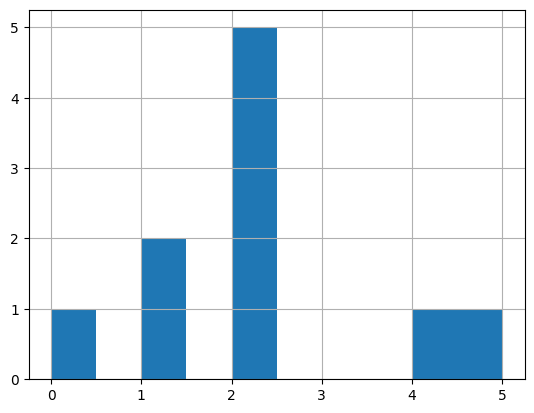

In [58]:
h = (s.hist())

### 字符串方法

当 `Series` 或者 `DataFrame` 的某一列是字符串时，我们可以用 `.str` 对这个字符串数组进行字符串的基本操作： 

In [59]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

print (s.str.lower())

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object


## 合并

### 连接

In [60]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,-0.594744,-0.251533,-1.116704,0.676541
1,1.461898,0.640633,-0.141315,0.235150
2,0.884035,-0.572171,-0.133988,-0.073820
3,0.280532,-0.866525,0.324120,-1.368113
4,-0.755109,0.055178,-1.247796,0.559952
5,-0.689093,-2.868849,0.637971,2.234863
6,-0.032057,-1.678542,0.952162,-0.837023
7,-0.066279,-0.627400,-0.516759,-0.092002
8,-0.113251,-0.872622,0.811248,-0.122793
9,0.424751,-0.584556,-0.337271,-0.148660


可以使用 `pd.concat` 函数将多个 `pandas` 对象进行连接：

In [61]:
pieces = [df[:2], df[4:5], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,-0.594744,-0.251533,-1.116704,0.676541
1,1.461898,0.640633,-0.141315,0.235150
4,-0.755109,0.055178,-1.247796,0.559952
7,-0.066279,-0.627400,-0.516759,-0.092002
8,-0.113251,-0.872622,0.811248,-0.122793
9,0.424751,-0.584556,-0.337271,-0.148660


### 数据库中的 Join

`merge` 可以实现数据库中的 `join` 操作：

In [62]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

print (left)
print (right)

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [63]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### append

向 `DataFrame` 中添加行：

In [64]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

df

,A,B,C,D
0,1.221798,-0.093161,-0.475121,0.364496
1,-0.313565,0.310420,0.044379,0.454145
2,-0.665893,-1.959051,-0.257982,-0.571716
3,-0.704084,1.359126,-0.285861,0.361636
4,0.524274,-0.246828,0.854765,0.121688
5,0.738565,-0.329549,1.923208,0.237496
6,-0.047559,-0.880659,-0.091197,0.916707
7,-0.282367,1.163620,-0.029955,-0.920115


将第三行的值添加到最后：

In [65]:
s = df.iloc[3]

df.append(s, ignore_index=True)

C:\Users\Lenod\AppData\Local\Temp\ipykernel_16712\3987623781.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)


,A,B,C,D
0,1.221798,-0.093161,-0.475121,0.364496
1,-0.313565,0.310420,0.044379,0.454145
2,-0.665893,-1.959051,-0.257982,-0.571716
3,-0.704084,1.359126,-0.285861,0.361636
4,0.524274,-0.246828,0.854765,0.121688
5,0.738565,-0.329549,1.923208,0.237496
6,-0.047559,-0.880659,-0.091197,0.916707
7,-0.282367,1.163620,-0.029955,-0.920115
8,-0.704084,1.359126,-0.285861,0.361636


### Grouping

In [66]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,-0.386035,-0.393661
1,bar,one,-0.228066,0.792573
2,foo,two,-0.367390,1.187226
3,bar,three,-2.703887,-0.150046
4,foo,two,0.157270,1.197180
5,bar,two,0.557389,-0.363438
6,foo,one,-0.058375,1.071507
7,foo,three,0.786862,0.548152


按照 `A` 的值进行分类：（注：`df.groupby('A').sum()`已被弃用）

In [68]:
df.groupby('A')[['C', 'D']].sum()


,C,D
A,,
bar,-2.374565,0.279089
foo,0.132333,3.610403


按照 `A, B` 的值进行分类：

In [69]:
df.groupby(['A', 'B'])[['C', 'D']].sum()

C         D
A   B                        
bar one   -0.228066  0.792573
    three -2.703887 -0.150046
    two    0.557389 -0.363438
foo one   -0.444409  0.677846
    three  0.786862  0.548152
    two   -0.210120  2.384405

## 改变形状

### Stack

产生一个多 `index` 的 `DataFrame`：

In [70]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df

A         B
first second                    
bar   one    -0.352168 -1.098365
      two    -0.462687 -0.014625
baz   one    -0.370812 -0.801410
      two    -1.737613  0.514036
foo   one     0.735477  1.328235
      two     0.937222  0.410394
qux   one    -0.535743  0.291288
      two    -0.251458 -1.927672

`stack` 方法将 `columns` 变成一个新的 `index` 部分：

In [71]:
df2 = df[:4]

stacked = df2.stack()

stacked

first  second   
bar    one     A   -0.352168
               B   -1.098365
       two     A   -0.462687
               B   -0.014625
baz    one     A   -0.370812
               B   -0.801410
       two     A   -1.737613
               B    0.514036
dtype: float64

可以使用 `unstack()` 将最后一级 `index` 放回 `column`：

In [72]:
stacked.unstack()

A         B
first second                    
bar   one    -0.352168 -1.098365
      two    -0.462687 -0.014625
baz   one    -0.370812 -0.801410
      two    -1.737613  0.514036

也可以指定其他的级别：

In [73]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.352168 -0.462687
      B -1.098365 -0.014625
baz   A -0.370812 -1.737613
      B -0.801410  0.514036

## 时间序列

金融分析中常用到时间序列数据：

In [74]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06   -0.220925
2012-03-07    0.436977
2012-03-08    0.805769
2012-03-09   -0.021827
2012-03-10   -0.100537
Freq: D, dtype: float64

标准时间表示：

In [75]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-06 00:00:00+00:00   -0.220925
2012-03-07 00:00:00+00:00    0.436977
2012-03-08 00:00:00+00:00    0.805769
2012-03-09 00:00:00+00:00   -0.021827
2012-03-10 00:00:00+00:00   -0.100537
Freq: D, dtype: float64

改变时区表示：

In [76]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.220925
2012-03-06 19:00:00-05:00    0.436977
2012-03-07 19:00:00-05:00    0.805769
2012-03-08 19:00:00-05:00   -0.021827
2012-03-09 19:00:00-05:00   -0.100537
Freq: D, dtype: float64

## Categoricals

In [77]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


可以将 `grade` 变成类别：

In [78]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

将类别的表示转化为有意义的字符：

In [79]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

df["grade"]

C:\Users\Lenod\AppData\Local\Temp\ipykernel_16712\1332880467.py:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  df["grade"].cat.categories = ["very good", "good", "very bad"]


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

添加缺失的类别：

In [80]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

使用 `grade` 分组：

In [81]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 绘图

使用 `ggplot` 风格：

In [82]:
plt.style.use('ggplot')

`Series` 绘图：

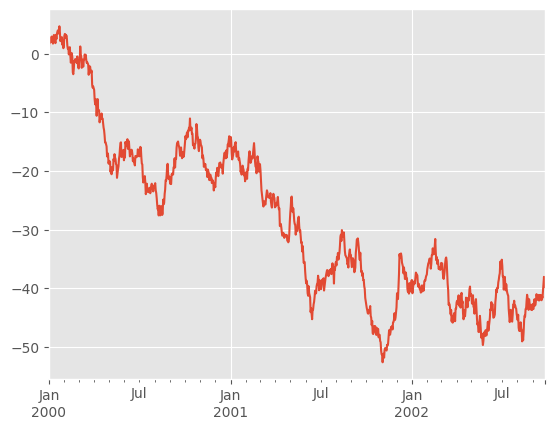

In [83]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

p = ts.cumsum().plot()

`DataFrame` 按照 `columns` 绘图：

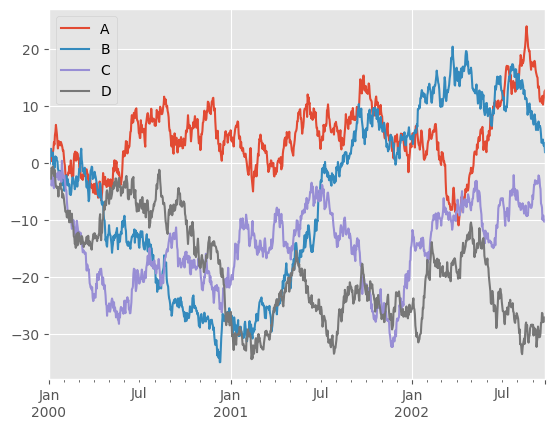

In [84]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df.cumsum().plot()
p = plt.legend(loc="best")

## 文件读写

### csv

写入文件：

In [82]:
df.to_csv('foo.csv')

从文件中读取：

In [83]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.011554,1.200283,-0.310949,-1.060734
1,2000-01-02,-1.030894,0.660518,-0.214002,-0.422014
2,2000-01-03,-0.488692,1.709209,-0.602208,1.115456
3,2000-01-04,-0.440243,0.826692,0.321648,-0.351698
4,2000-01-05,-0.165684,1.297303,0.817233,0.174767


### hdf5

写入文件：

In [84]:
df.to_hdf("foo.h5", "df")

读取文件：

In [85]:
pd.read_hdf('foo.h5','df').head()

,A,B,C,D
2000-01-01,-1.011554,1.200283,-0.310949,-1.060734
2000-01-02,-1.030894,0.660518,-0.214002,-0.422014
2000-01-03,-0.488692,1.709209,-0.602208,1.115456
2000-01-04,-0.440243,0.826692,0.321648,-0.351698
2000-01-05,-0.165684,1.297303,0.817233,0.174767


### excel

写入文件：

In [86]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

读取文件：

In [87]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

,A,B,C,D
2000-01-01,-1.011554,1.200283,-0.310949,-1.060734
2000-01-02,-1.030894,0.660518,-0.214002,-0.422014
2000-01-03,-0.488692,1.709209,-0.602208,1.115456
2000-01-04,-0.440243,0.826692,0.321648,-0.351698
2000-01-05,-0.165684,1.297303,0.817233,0.174767


清理生成的临时文件：

In [88]:
import glob
import os

for f in glob.glob("foo*"):
    os.remove(f)